In [1]:
# Imports
import numpy as np
import datetime,os
import pandas as pd
from fuzzywuzzy import fuzz
import pyodbc
import re
from itertools import product

# Read in STR table
def read_STR(dbpath):
    # Connect to Access DB
    conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ='+dbpath+';')
    # Read Single Transactions table
    STR = pd.read_sql_query(
    '''
    SELECT * FROM STR
    '''
    ,conn).reset_index(drop=True)
    # Close connection
    conn.close()
    # Transform STR
    STR['Date_booked'] = pd.to_datetime(STR['Date_booked'])
    STR['Date_ordered'] = pd.to_datetime(STR['Date_ordered'])
    STR['Value_transaction'] = STR['Value_transaction'].astype('float')
    return STR

# Read in TRI table
def read_TRI(dbpath):
    # Connect to Access DB
    conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ='+dbpath+';')
    # Read Transaction Information table
    TRI = pd.read_sql_query(
    '''
    SELECT * FROM TRINFORMATION
    '''
    ,conn).reset_index(drop=True)
    # Close connection
    conn.close()
    return TRI

In [2]:
# Path definitions
dbpath = '..\\..\\..\\..\\banking.accdb'
# Read existing databases
STR = read_STR(dbpath)
TRI = read_TRI(dbpath)

In [42]:
df = STR[['Date_booked','Value_transaction']]
df = df.drop(index=df[df['Value_transaction']>=0].index).reset_index(drop=True)

df['YYYY-MM'] = pd.to_datetime(df['Date_booked'].apply(lambda x: x.strftime('%m-%Y')))
df['YYYY-MM-DD'] = pd.to_datetime(df['Date_booked'].apply(lambda x: x.strftime('%d-%m-%Y')))

df['DD'] = df['Date_booked'].apply(lambda x: x.day)
df['MM'] = df['Date_booked'].apply(lambda x: x.month)
df['YYYY'] = df['Date_booked'].apply(lambda x: x.year)

df = df.drop(columns=['Date_booked'])

In [73]:
rf_monthly = df[['YYYY-MM','Value_transaction']].groupby(['YYYY-MM']).sum().abs()
rf_daily = df[['YYYY-MM-DD','Value_transaction']].groupby(['YYYY-MM-DD']).sum().abs()

rf_monthly['Date'] = rf_monthly.apply(lambda x: x.index)
rf_daily['Date'] = rf_daily.apply(lambda x: x.index)

rf_daily['Year'] = rf_daily.apply(lambda x: x['Date'].year,axis=1)
rf_monthly['Year'] = rf_monthly.apply(lambda x: x['Date'].year,axis=1)

rf_daily['Month'] = rf_daily.apply(lambda x: x['Date'].month,axis=1)
rf_monthly['Month'] = rf_monthly.apply(lambda x: x['Date'].month,axis=1)

rf_daily['Day'] = rf_daily.apply(lambda x: x['Date'].day,axis=1)
rf_monthly['Day'] = rf_monthly.apply(lambda x: x['Date'].day,axis=1)

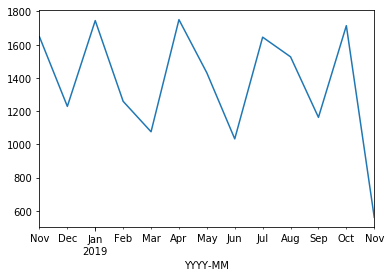

In [74]:
rf_monthly['Value_transaction'].plot()

In [105]:
c_year = 2019
c_month = 10

In [134]:
start_date = '{}-{}-{}'.format(str(c_year),str(str(c_month).zfill(2)),'01')
end_date = '{}-{}-{}'.format(str(c_year if c_month!=12 else c_year+1),str(str((c_month)%12+1).zfill(2)),'01')

c_index = pd.date_range(
    start=start_date,
    end=end_date
)[:-1]

In [136]:
tf = rf_daily[(rf_daily['Year']==2019)&(rf_daily['Month']==10)]

In [139]:
tf.set_index(c_index)

ValueError: Length mismatch: Expected axis has 14 elements, new values have 31 elements